## Task 01

Convergence of a Geometric Series: $\frac{a}{1-r}$ with $\sum{ar^k}$


## Task 02

In [12]:
import numpy as np

class Lazy():
    def __init__(self):
        # Start action, 0 = chores, 1 = fun
        if np.random.rand()<0.5:
            self.action = 0
        else:
            self.action = 1

    def reset(self):
        if np.random.rand()<0.5:
            self.action = 0
        else:
            self.action = 1

    def policy(self):
        if np.random.rand() > 0.95:
            if self.action == 0:
                self.action = 1
            else:
                self.action = 0
        else:
            self.action = self.action
        return self.action
    
    def give_reward(self, action):
        if action == 0:
            reward = 0
        else:
            reward = 1
        return reward

    def mc(self, gamma, steps):
        g_t = 0
        for k in range(steps):
            action = self.policy()
            reward = self.give_reward(action)
            g_t += reward*(gamma**k)
        return g_t      

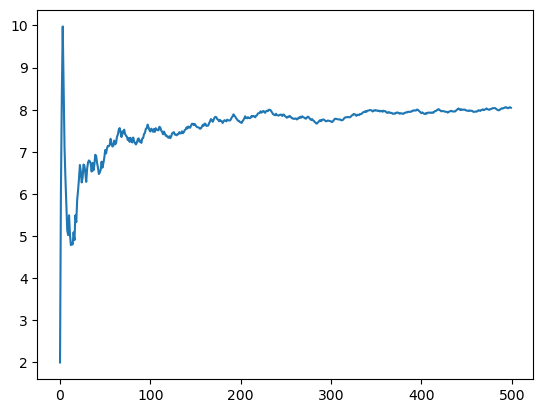

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

epochs = 500

def mc_estimate():
    agent = Lazy()
    mc_return = []
    est = []

    for _ in range(epochs):
        g_t = agent.mc(0.95, 36)
        mc_return.append(g_t)
        est.append(np.mean(mc_return))
        agent.reset()
    return est

est = mc_estimate()
plt.plot(np.arange(epochs), est);

## Task 03

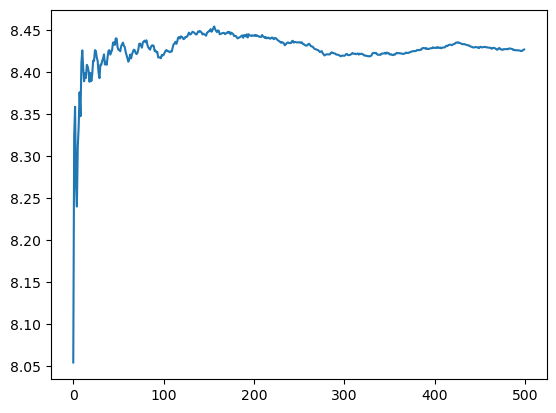

In [32]:
avg_est = []
std_est = []
li = {}

for k in range(epochs):
    est = mc_estimate()
    li[k] = est


for j in range(500):
    tt = []
    for i in range(500):
        tt.append(li[i][j])
    avg_est.append(np.mean(tt))
    #std_est.append(np.std(est))

fig, ax = plt.subplots()
ax.plot(np.arange(epochs), avg_est)
#ax2=ax.twinx()
#ax2.plot(np.arange(epochs), std_est, color="red");"""